# Imports

In [3]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.utils.create_figure import evaluate_and_save
from config.settings import saved_models_path
from config.settings import processed_data_dif_set

In [4]:
df = pd.read_csv(processed_data_dif_set)
# get the columns
s_x = df['xCenter'].values
s_y = df['yCenter'].values
v_x = df['xVelocity'].values
v_y = df['yVelocity'].values
a_x = df['xAcceleration'].values
a_y = df['yAcceleration'].values
a_x_a = df['xAcceleration_a']
a_y_a = df['yAcceleration_a']
a_x_b = df['xAcceleration_b']
a_y_b = df['yAcceleration_b']
v_x_a = df['xVelocity_a']
v_y_a = df['yVelocity_a']
v_x_b = df['xVelocity_b']
v_y_b = df['yVelocity_b']
s_x_a = df['xCenter_a']
s_y_a = df['yCenter_a']
s_x_b = df['xCenter_b']
s_y_b = df['yCenter_b']


## Load models 

In [5]:
# Load the models
def load_model(model_name):
    model_file_path = os.path.join(saved_models_path, f'delta_model_2/{model_name}.pkl')
    
    if os.path.exists(model_file_path):
        with open(model_file_path, 'rb') as file:
            loaded_model = pickle.load(file)
        
        print(f'Model "{model_name}" loaded from: {model_file_path}')
        return loaded_model
    else:
        print(f'Model file not found for "{model_name}"')
        print(model_file_path)
        return None

loaded_first_model = load_model('first_model')

Model "first_model" loaded from: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/delta_model_2/first_model.pkl


## Load the coefficients

In [6]:
# Get the coefficients
c_1_overline = loaded_first_model.coef_[0]
c_2_overline = loaded_first_model.coef_[1]

print(f'C̅₁: {c_1_overline}')
print(f'C̅₂: {c_2_overline}')

C̅₁: -0.00363416025497144
C̅₂: 0.026573824992562736


Rearange the constants:
\begin{align}
   c_1 =  \frac{1}{\overline c_1}
\\ c_2 =  \frac{1}{\overline c_2}
\\ c_3 =  \frac{\overline c_2}{\overline c_1}
\\ c_4 =  \frac{\overline c_1}{\overline c_2}
\end{align}



In [7]:
# Rearange the coefficients
c_1 = 1 / c_1_overline 
c_2 = 1 / c_2_overline
c_3 = c_2_overline / c_1_overline
c_4 = c_1_overline / c_2_overline

print(f'c₁: {c_1}')
print(f'c₂: {c_2}')
print(f'c₃: {c_3}')
print(f'c₄: {c_4}')

c₁: -275.1667317455319
c₂: 37.6310147402518
c₃: -7.312232573181221
c₄: -0.13675713812326748


# Integration method

\begin{align}
s_a(k) = - c_3 v(k) + c_1 a(k) + s_b(k)     \\
v_a(k) = - c_4 s(k) + c_2 a(k) + v_b(k)
\end{align}




In [8]:
# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:

In [9]:
# x component
s_x_test = - c_3 * v_x[:] + c_1 * a_x[:] + s_x_b
v_x_test = - c_4 * s_x[:] + c_2 * a_x[:] + v_x_b

# y component
s_y_test = - c_3 * v_y[:] + c_1 * a_y[:] + s_y_b
v_y_test = - c_4 * s_y[:] + c_2 * a_y[:] + v_y_b


Mean Squared Error (MSE): 1.9601e+02
Mean Absolute Error (MAE): 9.8951e+00
R-squared (R²) Score: 7.1761e-01


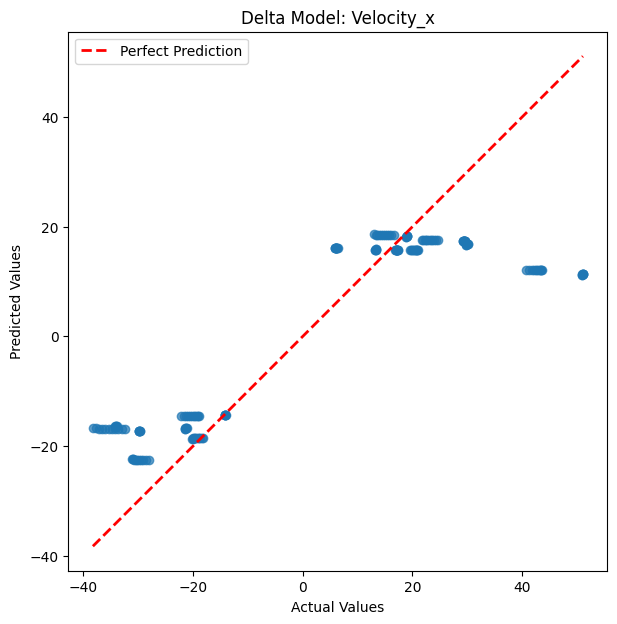

Mean Squared Error (MSE): 5.0252e+02
Mean Absolute Error (MAE): 1.6174e+01
R-squared (R²) Score: 3.9553e-01


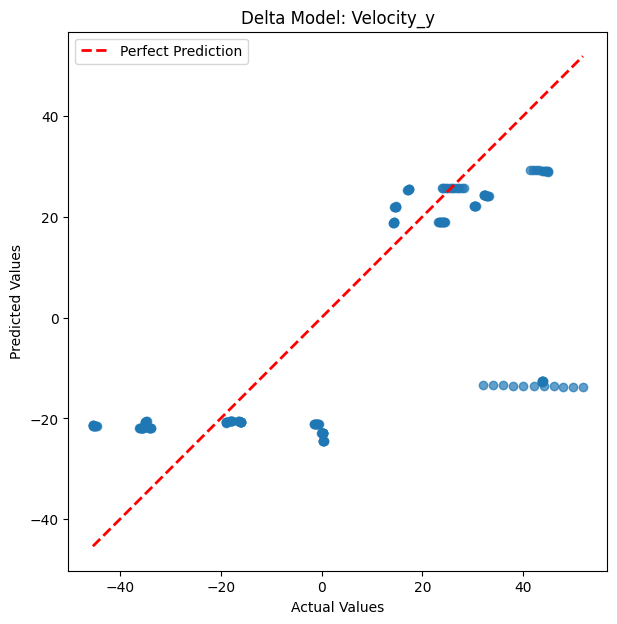

Mean Squared Error (MSE): 1.0481e+04
Mean Absolute Error (MAE): 7.2355e+01
R-squared (R²) Score: 5.8123e-01


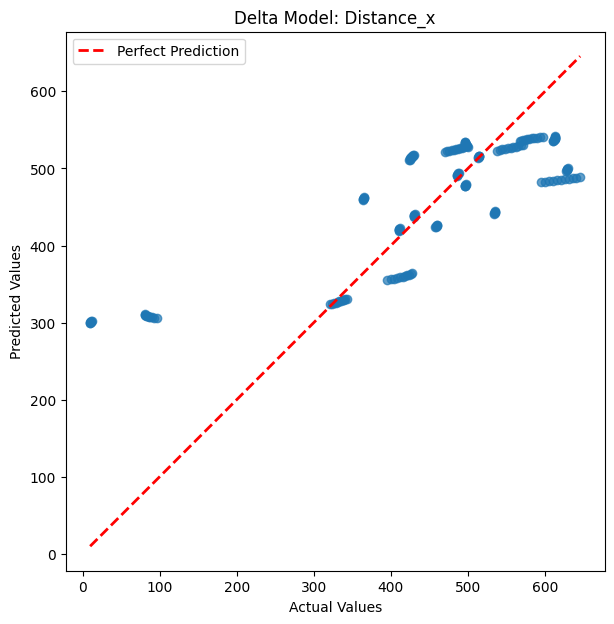

Mean Squared Error (MSE): 2.6869e+04
Mean Absolute Error (MAE): 1.1827e+02
R-squared (R²) Score: -4.1962e-01


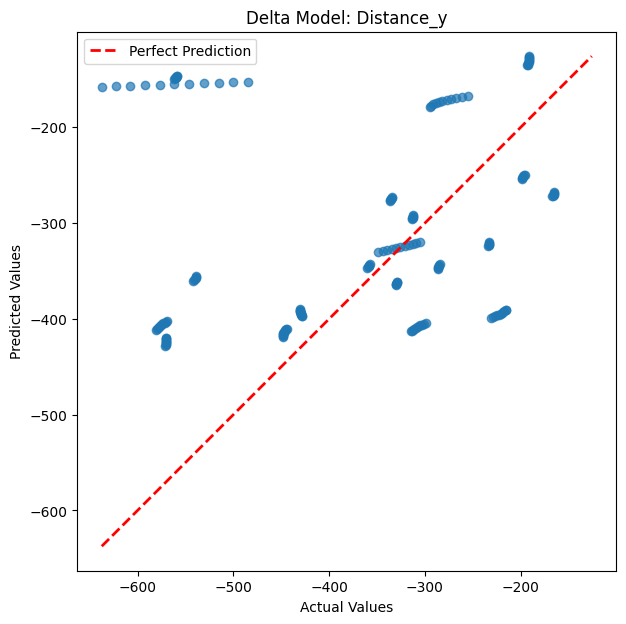

In [11]:
save_dir = '/home/ali/tum/motion_planning/social_ai_practical_course/reports/figures/delta_model'
#evaluate_and_save(y_a_x, s_a_x_pred, os.path.join(save_dir, 'ballistic_integ_dist_x'), 'Ballistict Integration: Distance_x')

evaluate_and_save(v_x_test,v_x_a,os.path.join(save_dir, 'delta_model_2_vel_x'), 'Delta Model: Velocity_x')
evaluate_and_save(v_y_test,v_y_a,os.path.join(save_dir, 'delta_model_2_vel_y'), 'Delta Model: Velocity_y')
evaluate_and_save(s_x_test,s_x_a,os.path.join(save_dir, 'delta_model_2_dist_x'), 'Delta Model: Distance_x')
evaluate_and_save(s_y_test,s_y_a,os.path.join(save_dir, 'delta_model_2_dist_y'), 'Delta Model: Distance_y')



MSE: 9.895070444552209


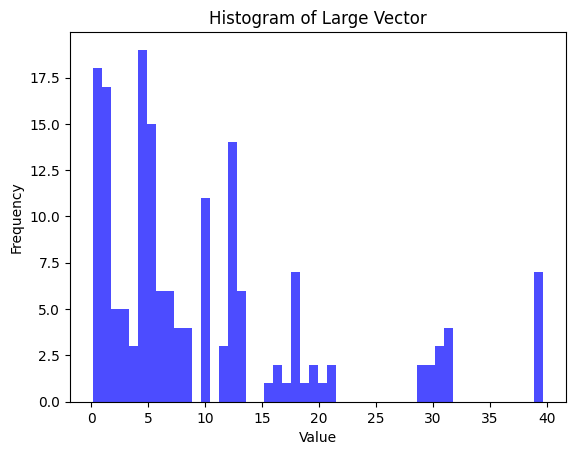

MSE: 16.17433698145613


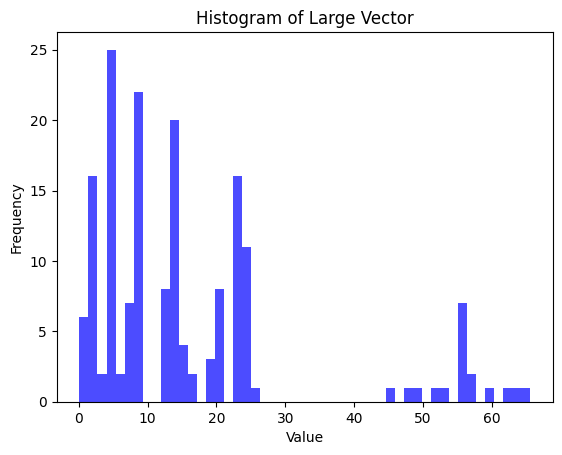

MSE: 72.35505641857746


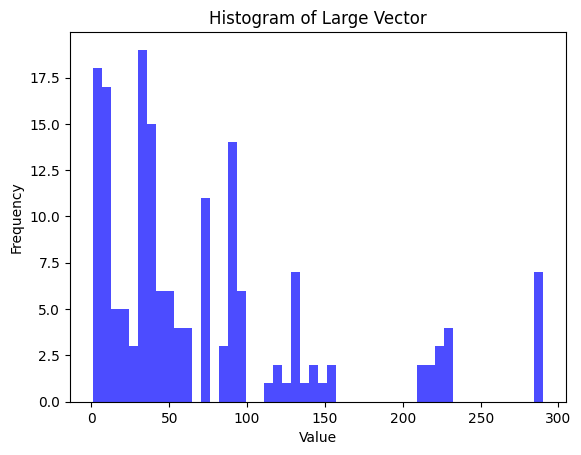

MSE: 118.27051372541315


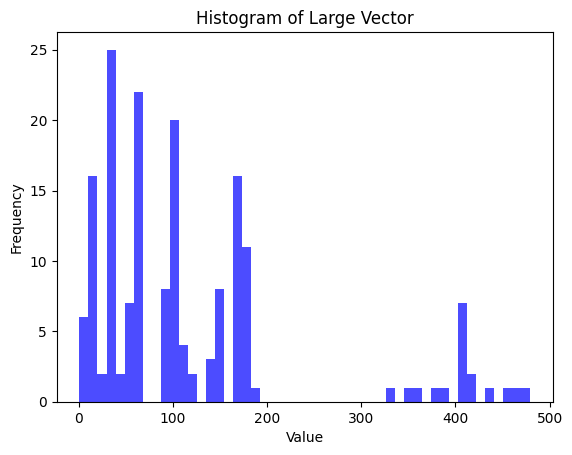

In [9]:
def mean_error(actual, test):
    difference = np.abs(actual - test)
    
    # Calculate the
    mean = np.mean(difference)
    print(f"MSE: {mean}")

    # Print a bar graph
    plt.hist(difference, bins=50, color='blue', alpha=0.7, log=False)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Large Vector')
    plt.show()

mean_error(v_x_test,v_x_a)
mean_error(v_y_test,v_y_a)
mean_error(s_x_test,s_x_a)
mean_error(s_y_test,s_y_a)
